In [ ]:
from google.colab import files
kontak = files.upload()
for fn in kontak.keys():
  print('Nama file "{name}" dengan panjang {length} bytes'.format(
      name=fn, length=len(kontak[fn])))


Saving ASII.JK.csv to ASII.JK (1).csv
Nama file "ASII.JK (1).csv" dengan panjang 16201 bytes


In [ ]:
!pip install scikit-fuzzy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 6.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894078 sha256=ce84d1d858b6bc59560ea233da8ff122d5f32094962457d51009609747188ad8
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


In [ ]:
import pandas as pd
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from seaborn import scatterplot as scatter
import yfinance as yf

In [ ]:
data =  pd.read_csv('ASII.JK.csv')

In [ ]:
# Pilih kolom yang relevan untuk clustering
data_clustering = data[['Open', 'High', 'Low', 'Close', 'Volume']]

In [ ]:
data_clustering

,Open,High,Low,Close,Volume
0,6925.0,6925.0,6775.0,6875.0,15008600
1,6925.0,6950.0,6825.0,6950.0,19068800
2,6900.0,6900.0,6750.0,6750.0,22261900
3,6800.0,6825.0,6675.0,6775.0,27963000
4,6700.0,6825.0,6700.0,6775.0,15150400
...,...,...,...,...,...
197,5200.0,5250.0,5175.0,5250.0,52567200
198,5200.0,5275.0,5200.0,5250.0,75883000
199,5300.0,5400.0,5250.0,5400.0,46040700
200,5400.0,5450.0,5300.0,5400.0,33055000


In [ ]:
# Normalize the data
data_normalized = (data_clustering - data_clustering.min()) / (data_clustering.max() - data_clustering.min())


In [ ]:
data_normalized

,Open,High,Low,Close,Volume
0,0.942748,0.910714,0.922179,0.917092,0.083247
1,0.942748,0.917582,0.935149,0.936224,0.105767
2,0.936387,0.903846,0.915694,0.885204,0.123478
3,0.910941,0.883242,0.896239,0.891582,0.155100
4,0.885496,0.883242,0.902724,0.891582,0.084033
...,...,...,...,...,...
197,0.503817,0.450549,0.507134,0.502551,0.291569
198,0.503817,0.457418,0.513619,0.502551,0.420892
199,0.529262,0.491758,0.526589,0.540816,0.255369
200,0.554707,0.505495,0.539559,0.540816,0.183343


In [ ]:
# Transpose the data for skfuzzy
data_array = data_normalized.T.values


In [ ]:
data_array

array([[0.94274809, 0.94274809, 0.93638677, ..., 0.52926209, 0.55470738,
        0.52926209],
       [0.91071429, 0.91758242, 0.90384615, ..., 0.49175824, 0.50549451,
        0.51923077],
       [0.92217899, 0.93514916, 0.9156939 , ..., 0.52658885, 0.53955901,
        0.53955901],
       [0.91709184, 0.93622449, 0.88520408, ..., 0.54081633, 0.54081633,
        0.54719388],
       [0.08324667, 0.10576696, 0.12347781, ..., 0.25536925, 0.18334279,
        0.25178171]])

In [ ]:
# Define number of clusters
n_clusters = 3

# Apply Fuzzy C-Means
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    data_array, n_clusters, 2, error=0.005, maxiter=1000, init=None)


In [ ]:
# Get cluster membership
cluster_membership = np.argmax(u, axis=0)

C-Means

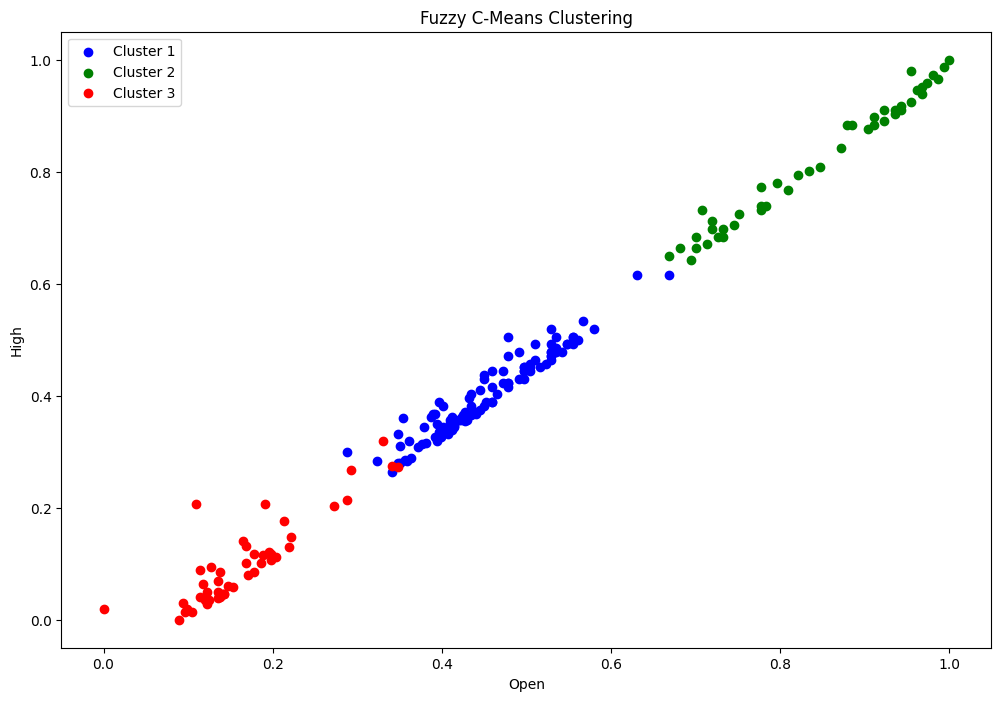

In [ ]:
# Plot the clustered data
plt.figure(figsize=(12, 8))
colors = ['b', 'g', 'r']
for j in range(n_clusters):
    plt.scatter(data_normalized.iloc[cluster_membership == j, 0],
                data_normalized.iloc[cluster_membership == j, 1], color=colors[j], label=f'Cluster {j+1}')
plt.legend()
plt.title('Fuzzy C-Means Clustering')
plt.xlabel('Open')
plt.ylabel('High')
plt.show()

Time Series

In [ ]:
!pip install yfinance matplotlib

In [ ]:
data = pd.read_csv('ASII.JK.csv', parse_dates=['Date'])

In [ ]:
data.set_index('Date', inplace=True)

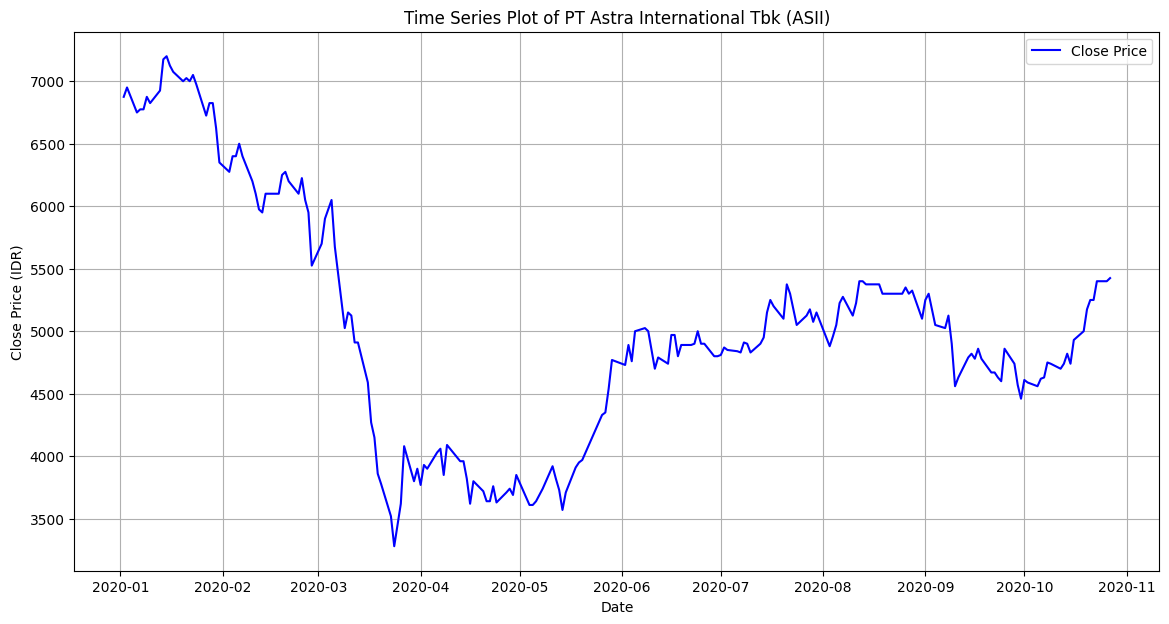

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Close'], label='Close Price', color='b')

plt.title('Time Series Plot of PT Astra International Tbk (ASII)')
plt.xlabel('Date')
plt.ylabel('Close Price (IDR)')
plt.legend()
plt.grid(True)
plt.show()

Moving Averages

In [ ]:
data['MA20'] = data['Close'].rolling(window=20).mean()  # Moving Average 20 hari
data['MA50'] = data['Close'].rolling(window=50).mean()  # Moving Average 50 hari

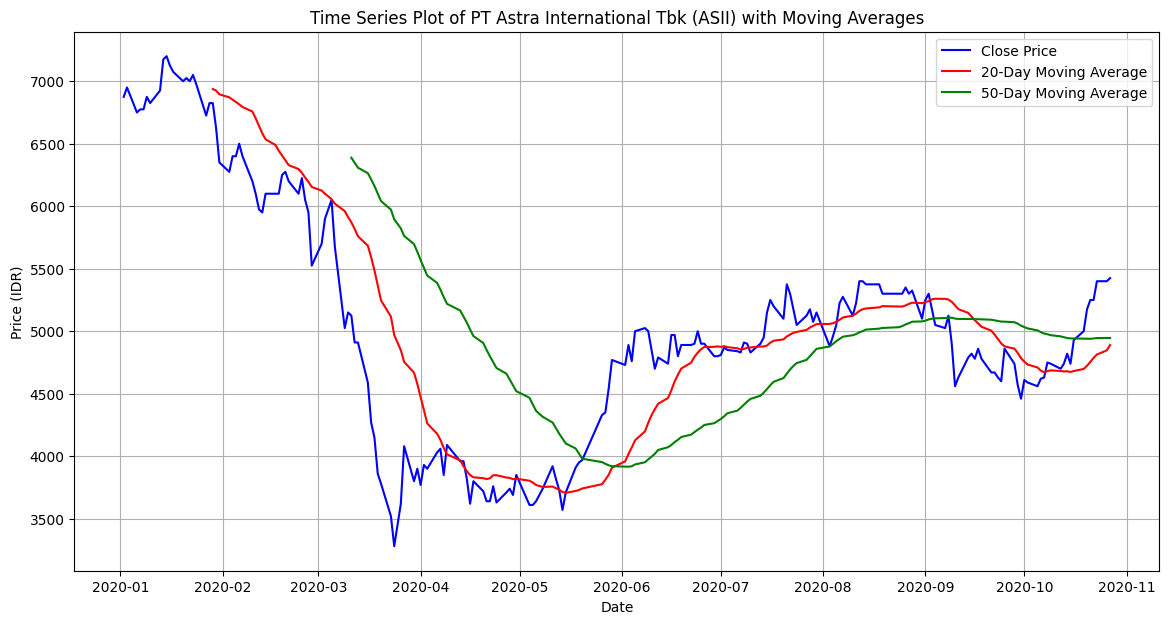

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Close'], label='Close Price', color='b')
plt.plot(data.index, data['MA20'], label='20-Day Moving Average', color='r')
plt.plot(data.index, data['MA50'], label='50-Day Moving Average', color='g')

plt.title('Time Series Plot of PT Astra International Tbk (ASII) with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (IDR)')
plt.legend()
plt.grid(True)
plt.show()

Correlation Matrix

In [ ]:
import seaborn as sns

In [ ]:
correlation_matrix = data[['Open', 'High', 'Low', 'Close', 'Volume']].corr()

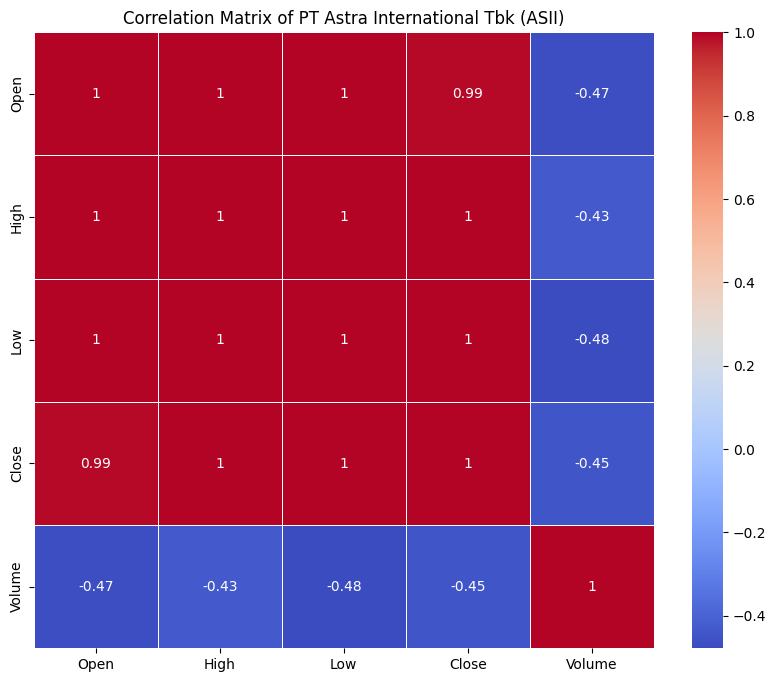

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of PT Astra International Tbk (ASII)')
plt.show()

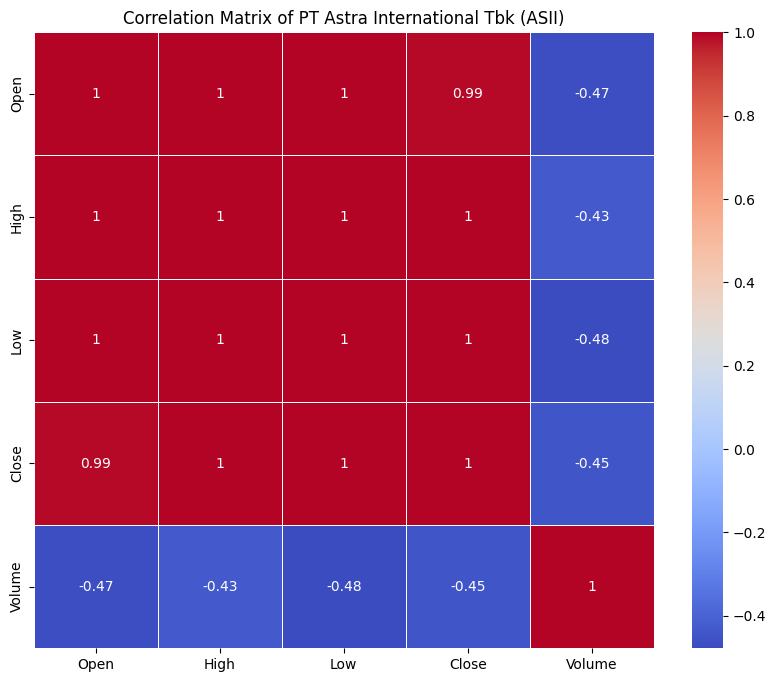

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of PT Astra International Tbk (ASII)')
plt.show()

Candlestick Chart

In [ ]:
!pip install mplfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 2.1 MB/s eta 0:00:00


In [ ]:
import mplfinance as mpf

In [ ]:
data.sort_index(inplace=True)

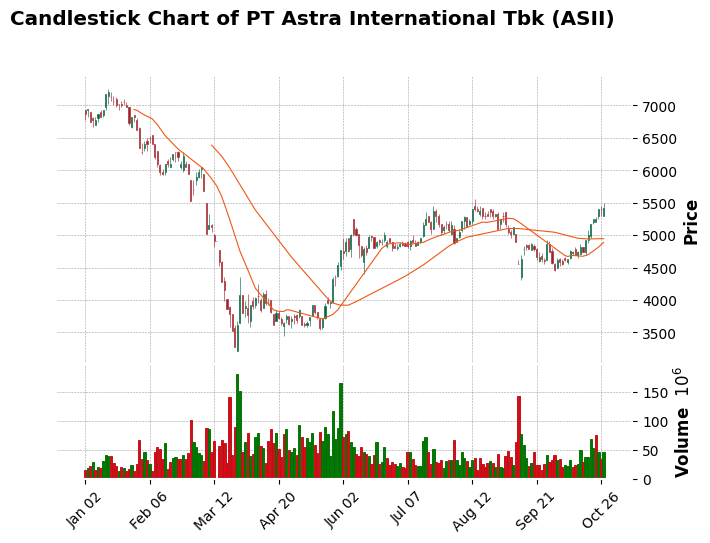

In [ ]:
mpf.plot(data, type='candle', volume=True, title='Candlestick Chart of PT Astra International Tbk (ASII)', style='charles', mav=(20,50))


Anomaly Detection

In [ ]:
data = pd.read_csv('ASII.JK.csv', parse_dates=['Date'])

In [ ]:
data.set_index('Date', inplace=True)
close_prices = data['Close']

In [ ]:
mean = np.mean(close_prices)
std_dev = np.std(close_prices)

In [ ]:
lower_threshold = mean - 3 * std_dev
upper_threshold = mean + 3 * std_dev

In [ ]:
anomalies = close_prices[(close_prices < lower_threshold) | (close_prices > upper_threshold)]

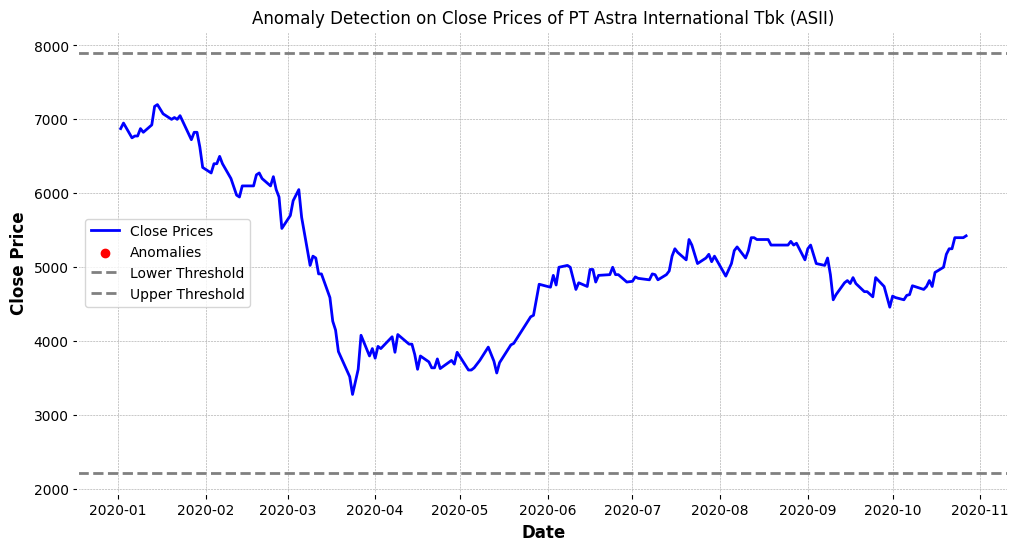

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(close_prices.index, close_prices.values, label='Close Prices', color='blue')
plt.scatter(anomalies.index, anomalies.values, color='red', label='Anomalies')
plt.axhline(y=lower_threshold, color='gray', linestyle='--', label='Lower Threshold')
plt.axhline(y=upper_threshold, color='gray', linestyle='--', label='Upper Threshold')
plt.title('Anomaly Detection on Close Prices of PT Astra International Tbk (ASII)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [ ]:
print("Anomalies Detected:")
print(anomalies)

Anomalies Detected:
Series([], Name: Close, dtype: float64)


Scatter Plot

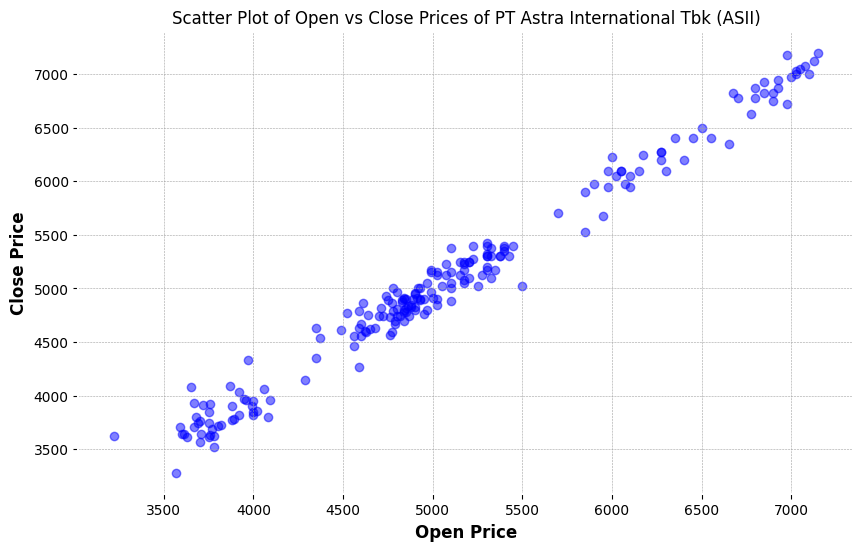

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Open'], data['Close'], alpha=0.5, c='blue')
plt.title('Scatter Plot of Open vs Close Prices of PT Astra International Tbk (ASII)')
plt.xlabel('Open Price')
plt.ylabel('Close Price')
plt.grid(True)
plt.show()

Preliminary Clustering

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


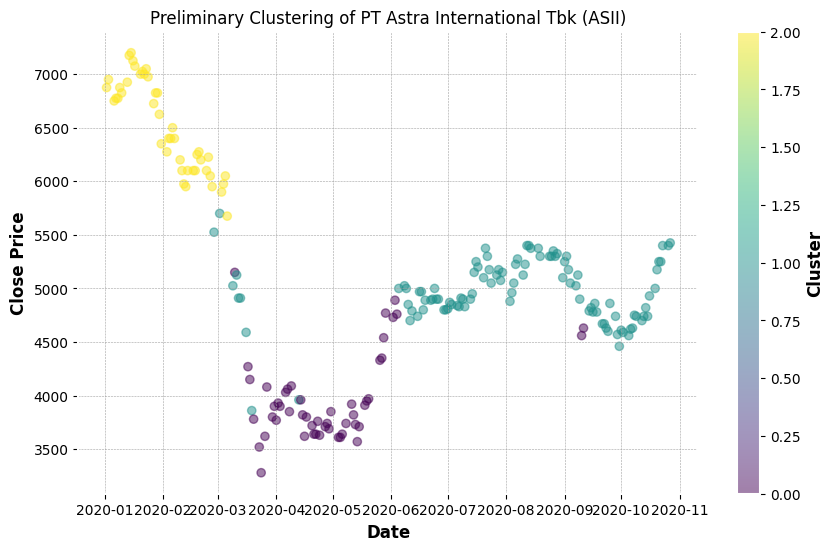

In [ ]:
features = data[['Open', 'Close', 'Volume']]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_features)
data['Cluster'] = kmeans.labels_

plt.figure(figsize=(10, 6))
plt.scatter(data.index, data['Close'], c=data['Cluster'], cmap='viridis', alpha=0.5)
plt.title('Preliminary Clustering of PT Astra International Tbk (ASII)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()